## Wake County - Restaurant Food Inspections Analysis

In [1]:
# import pandas, numpy, matplotlib, seaborn 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing the requests library
import requests

In [2]:
# !pip install ipynb
# !pip install auto-sklearn

### Resources
 1. [Restaurants in Wake County Data Info](https://www.arcgis.com/home/item.html?id=124c2187da8c41c59bde04fa67eb2872)
 2. [Wake County Open Data](https://data-wake.opendata.arcgis.com/search?tags=restaurants)
 3. [Food Inspection Violations Data Info](https://data.wakegov.com/datasets/Wake::food-inspection-violations/about)
 4. [Wake County Yelp Initiative](https://ash.harvard.edu/news/wake-county-yelp-initiative)
 5. [Yelp LIVES data](https://www.yelp.com/healthscores/feeds)

In [3]:
# the first time you run this, it will execute these, but run it again if you'd like
# warning: there's an issue where the arguments won't work so just use no-arg functions to pull
# from ipynb.fs.full.RestaurantInspectionsData import getFoodInspectionsDf, preprocess_inspections
# from ipynb.fs.full.WeatherData import getWeatherData, preprocess_weatherdata
# from ipynb.fs.full.YelpData import fetchYelpDataByPhone, preprocess_yelpdata
# from ipynb.fs.full.CrimeData import getCrimeDataDf, preprocess_crimedata

We're sourcing and pre-processing all the data in other notebooks and save the pre-processed data in csv files so we can load them into dataframes in our main file here. If you do want to source them from here, you're free to do so just uncomment the imports above so you can use the functions from the other notebooks. 

## Fetch Restaurant Inspections

In [4]:
# food_inspections_raw = getFoodInspectionsDf()
inspectionsdf = pd.read_csv('preprocessed_inspections.csv')
print(inspectionsdf.shape)
inspectionsdf.head()

(27343, 8)


,OBJECTID,HSISID,SCORE,DATE,DESCRIPTION,TYPE,INSPECTOR,PERMITID
0,22236469,4092017542,95.0,2018-03-23,NaN,Inspection,Laura McNeill,367
1,22236470,4092017542,93.5,2018-09-07,"*NOTICE* EFFECTIVE JANUARY 1, 2019, THE NC FOO...",Inspection,Laura McNeill,367
2,22236471,4092017542,93.0,2019-04-04,"*NOTICE* AS OF JANUARY 1, 2019, THE NC FOOD CO...",Inspection,Joanne Rutkofske,367
3,22236472,4092017542,93.5,2019-10-07,Follow-Up: 10/17/2019,Inspection,Naterra McQueen,367
4,22236473,4092017542,92.5,2020-05-19,"*NOTICE* AS OF JANUARY 1, 2019, THE NC FOOD CO...",Inspection,Naterra McQueen,367


## Fetch Restaurant Data 

In [5]:
# restaurants = pd.read_csv('preprocessed_restaurants.csv', dtype={'PHONENUMBER': str})
restaurantsdf = pd.read_csv('preprocessed_restaurants.csv')
print(restaurantsdf.shape)
restaurantsdf.head()

(2385, 12)


,OBJECTID,HSISID,NAME,ADDRESS1,CITY,POSTALCODE,PHONENUMBER,RESTAURANTOPENDATE,PERMITID,X,Y,GEOCODESTATUS
0,1891530,4092016487,PEACE CHINA,13220 Strickland RD,RALEIGH,27613,1.919677e+10,2013-08-14,2,-78.725938,35.908783,M
1,1891531,4092018622,Northside Bistro & Cocktails,832 SPRING FOREST RD,RALEIGH,27609,1.919891e+10,2021-05-13,22,-78.622635,35.866275,M
2,1891532,4092016155,DAILY PLANET CAFE,11 W JONES ST,RALEIGH,27601,1.919708e+10,2012-04-12,26,-78.639431,35.782205,M
3,1891533,4092016161,HIBACHI 88,3416 POOLE RD,RALEIGH,27610,1.919231e+10,2012-04-18,28,-78.579533,35.767246,M
4,1891534,4092017180,BOND BROTHERS BEER COMPANY,202 E CEDAR ST,CARY,27511,1.919459e+10,2016-03-11,29,-78.778021,35.787986,M


## Fetch violations

In [6]:
violationsdf = pd.read_csv('preprocessed_violations.csv')
print(violationsdf.shape)
violationsdf.head()

(178102, 15)


,OBJECTID,HSISID,INSPECTDATE,CATEGORY,CRITICAL,QUESTIONNO,VIOLATIONCODE,SEVERITY,SHORTDESC,INSPECTEDBY,COMMENTS,POINTVALUE,OBSERVATIONTYPE,VIOLATIONTYPE,CDCDATAITEM
0,188572810,4092017322,2020-07-10,Approved Source,NaN,9,3-201.11,NaN,Food obtained from approved source,Lauren Harden,3-201.11; PIC states that bakery items in disp...,0.0,OUT,NaN,Food shall be obtained from sources that compl...
1,188572819,4092110520,2018-03-05,Approved Source,NaN,10,3-202.11,NaN,Food received at proper temperature,Laura McNeill,3-202.11; pans of reheated beef steak received...,1.0,OUT,CDI,Refrigerated food shall be at a temperature of...
2,188572820,4092017143,2018-08-20,Approved Source,NaN,10,3-202.11,NaN,Food received at proper temperature,Jennifer Brown,3-202.11;Measured raw shell eggs at 49-50F upo...,0.0,OUT,CDI,Refrigerated food shall be at a temperature of...
3,188572821,4092110158,2019-02-20,Approved Source,NaN,10,3-202.11,NaN,Food received at proper temperature,Kaitlyn Yow,3-202.11;,0.0,N/O,NaN,Refrigerated food shall be at a temperature of...
4,188572822,4092014259,2019-09-23,Approved Source,NaN,10,3-202.11,NaN,Food received at proper temperature,Laura McNeill,3-202.11; upon arrival the manager had receive...,0.0,OUT,NaN,Refrigerated food shall be at a temperature of...


## Fetch weather data

In [7]:
# weatherdata_raw = getWeatherData()
# weatherdata = preprocess_weatherdata(weatherdata_raw.copy())
weatherdatadf = pd.read_csv('preprocessed_weatherdata.csv')
print(weatherdatadf.shape)
weatherdatadf.head()

(1406, 2)


,date,TAVG
0,2018-01-01,22.0
1,2018-01-02,20.0
2,2018-01-03,21.0
3,2018-01-04,26.0
4,2018-01-05,21.0


## Fetch Yelp Ratings Data

In [8]:
# read in yelp and restaurant data
yelpdatadf = pd.read_csv('preprocessed_yelpdata.csv')
print(yelpdatadf.shape)
yelpdatadf.head()

(2145, 9)


,name,is_closed,review_count,categories,rating,price,location,phone,display_phone
0,Peace China,True,63,"[{'alias': 'chinese', 'title': 'Chinese'}]",3.5,$,"{'address1': '13220 Strickland Rd', 'address2'...",19196769968,(919) 676-9968
1,Asian Cafe,True,7,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",3.0,$$,"{'address1': '13220 Strickland Rd', 'address2'...",19196769968,(919) 676-9968
2,Northside Bistro & Cocktails,False,23,"[{'alias': 'newamerican', 'title': 'American (...",4.5,NaN,"{'address1': '832 Spring Forest Rd', 'address2...",19198905225,(919) 890-5225
3,The Daily Planet Cafe,False,89,"[{'alias': 'cafes', 'title': 'Cafes'}, {'alias...",4.0,$$,"{'address1': '121 W Jones St', 'address2': '',...",19197078060,(919) 707-8060
4,Hibachi 88,False,46,"[{'alias': 'japanese', 'title': 'Japanese'}, {...",3.5,$,"{'address1': '3416-100 Poole Rd', 'address2': ...",19192311688,(919) 231-1688


## Pull legend from YELP Lives

In [9]:
legend = pd.read_csv('YELP(LIVES)/legend.csv')
display(legend)

,minimum_score,maximum_score,description
0,90,100,A
1,80,89,B
2,70,79,C
3,60,69,D
4,0,59,F


## Fetch crime data as proxy (daily police incidents)

In [10]:
# crime_data_raw = getCrimeDataDf()
# crimedatadf = preprocess_crimedata(crime_data_raw)
crimedatadf = pd.read_csv('preprocessed_crimedata.csv')
print(crimedatadf.shape)
crimedatadf.head()

(189202, 10)


,OBJECTID,crime_category,crime_code,crime_description,crime_type,city,reported_year,reported_month,reported_day,reported_dayofwk
0,12042,MISCELLANEOUS,81A,Miscellaneous/All Other Non-Offenses,NaN,RALEIGH,2018,2,4,Sunday
1,12126,MISCELLANEOUS,81A,Miscellaneous/All Other Non-Offenses,NaN,RALEIGH,2018,2,27,Tuesday
2,12130,MISCELLANEOUS,81B,Miscellaneous/Deceased Person,NaN,RALEIGH,2018,2,14,Wednesday
3,12142,MISCELLANEOUS,81E,Miscellaneous/Lost Property,NaN,RALEIGH,2018,1,2,Tuesday
4,12203,MISCELLANEOUS,81A,Miscellaneous/All Other Non-Offenses,NaN,RALEIGH,2018,1,10,Wednesday


## Brainstorm Features

1.  Restaurant Data: POSTALCODE, RESTAURANTOPENDATE, X, Y, CITY
2.  Weather Data: Date (index), Avg Daily Hourly Temperature
3.  Restaurant Violations: the entirety / all features now

## Next Steps (we have T-minus 1 weeks) 

1.  Join tables by inspection. We want historical data per inspection and then we want to predict the risk scores for restaurants in high risk for future inspections. Note that although we have data around inspections by date, we don't really want to do a time series forecasting,bc time series forecasting sucks!
2.  Deal with missing values and encode variables 
3.  Feature engineering 
4.  Baseline model
5.  More complicated model
7.  Datasheets for datasets
8.  Hearsch - Ethical checklist 
9.  Visualizations and story telling!
10. Get started on a slideshow (FUN PART)

## Processing of data & feature engineering

## Combining DataFrames 

In [11]:
# Create copy of original DataFrames
rest_inspect = inspectionsdf.copy()
rest_df = restaurantsdf.copy()
rest_violation = violationsdf.copy()
temp_df = weatherdatadf.copy()
yelp_df = yelpdatadf.copy()
score_legend = legend.copy()
crime_df = crimedatadf.copy()

## Merge restaurant data & inspections files

In [12]:
# Merged the inspectionsdf & restaurantsdf based on same column names
rest_data = rest_inspect.merge(rest_df, how='outer', on=['OBJECTID','HSISID','PERMITID'])
rest_data.head()

,OBJECTID,HSISID,SCORE,DATE,DESCRIPTION,TYPE,INSPECTOR,PERMITID,NAME,ADDRESS1,CITY,POSTALCODE,PHONENUMBER,RESTAURANTOPENDATE,X,Y,GEOCODESTATUS
0,22236469,4092017542,95.0,2018-03-23,NaN,Inspection,Laura McNeill,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22236470,4092017542,93.5,2018-09-07,"*NOTICE* EFFECTIVE JANUARY 1, 2019, THE NC FOO...",Inspection,Laura McNeill,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22236471,4092017542,93.0,2019-04-04,"*NOTICE* AS OF JANUARY 1, 2019, THE NC FOOD CO...",Inspection,Joanne Rutkofske,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22236472,4092017542,93.5,2019-10-07,Follow-Up: 10/17/2019,Inspection,Naterra McQueen,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22236473,4092017542,92.5,2020-05-19,"*NOTICE* AS OF JANUARY 1, 2019, THE NC FOOD CO...",Inspection,Naterra McQueen,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Renaming restaurant violations inspectedby col to inspector
rv = rest_violation.rename({'INSPECTEDBY':'INSPECTOR'},axis='columns')
rv.head()

,OBJECTID,HSISID,INSPECTDATE,CATEGORY,CRITICAL,QUESTIONNO,VIOLATIONCODE,SEVERITY,SHORTDESC,INSPECTOR,COMMENTS,POINTVALUE,OBSERVATIONTYPE,VIOLATIONTYPE,CDCDATAITEM
0,188572810,4092017322,2020-07-10,Approved Source,NaN,9,3-201.11,NaN,Food obtained from approved source,Lauren Harden,3-201.11; PIC states that bakery items in disp...,0.0,OUT,NaN,Food shall be obtained from sources that compl...
1,188572819,4092110520,2018-03-05,Approved Source,NaN,10,3-202.11,NaN,Food received at proper temperature,Laura McNeill,3-202.11; pans of reheated beef steak received...,1.0,OUT,CDI,Refrigerated food shall be at a temperature of...
2,188572820,4092017143,2018-08-20,Approved Source,NaN,10,3-202.11,NaN,Food received at proper temperature,Jennifer Brown,3-202.11;Measured raw shell eggs at 49-50F upo...,0.0,OUT,CDI,Refrigerated food shall be at a temperature of...
3,188572821,4092110158,2019-02-20,Approved Source,NaN,10,3-202.11,NaN,Food received at proper temperature,Kaitlyn Yow,3-202.11;,0.0,N/O,NaN,Refrigerated food shall be at a temperature of...
4,188572822,4092014259,2019-09-23,Approved Source,NaN,10,3-202.11,NaN,Food received at proper temperature,Laura McNeill,3-202.11; upon arrival the manager had receive...,0.0,OUT,NaN,Refrigerated food shall be at a temperature of...


## Merge all restaurant data with violations 

In [14]:
# Merge all the restaurant dataframes together with NaN values
all_rest_df = rest_data.merge(rv, how='outer', on=['OBJECTID','HSISID','INSPECTOR'],indicator=True)
#all_rest_df.head()
all_rest_df.tail()


,OBJECTID,HSISID,SCORE,DATE,DESCRIPTION,TYPE,INSPECTOR,PERMITID,NAME,ADDRESS1,...,QUESTIONNO,VIOLATIONCODE,SEVERITY,SHORTDESC,COMMENTS,POINTVALUE,OBSERVATIONTYPE,VIOLATIONTYPE,CDCDATAITEM,_merge
207825,188994169,4092200203,NaN,NaN,NaN,NaN,Karla Crowder,NaN,NaN,NaN,...,23.0,.1825(a),NaN,Service sink or other approved method; mop sto...,.1825 (a); Must have at least 1 service sink o...,0.0,OUT,NaN,NaN,right_only
207826,188994170,4092200010,NaN,NaN,NaN,NaN,Karla Crowder,NaN,NaN,NaN,...,23.0,.1825(a),NaN,Service sink or other approved method; mop sto...,.1825 (a); A mop/service sink is not present o...,1.0,OUT,NaN,NaN,right_only
207827,188994171,4092200035,NaN,NaN,NaN,NaN,Jackson Hooton,NaN,NaN,NaN,...,23.0,5-203.13,NaN,Service sink or other approved method; mop sto...,5-203.13;,0.0,IN,NaN,Service Sink,right_only
207828,188994172,4092200120,NaN,NaN,NaN,NaN,Joanne Rutkofske,NaN,NaN,NaN,...,23.0,5-203.13,NaN,Service sink or other approved method; mop sto...,5-203.13; No mop sink available for mop water ...,0.0,OUT,R,Service Sink,right_only
207829,188994174,4092200185,NaN,NaN,NaN,NaN,Cristofer LeClair,NaN,NaN,NaN,...,24.0,.1825(a),NaN,Sewage and waste water disposal,".1825 (a); In room 250, observed a clogged sho...",0.0,OUT,NaN,NaN,right_only


In [15]:
all_rest_df['INSPECTDATE']

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
207825    2020-08-04
207826    2021-05-17
207827    2019-06-10
207828    2020-03-13
207829    2020-07-27
Name: INSPECTDATE, Length: 207830, dtype: object

In [16]:
print(all_rest_df.isna().sum())
all_rest_df.shape

OBJECTID                   0
HSISID                     0
SCORE                 180487
DATE                  180487
DESCRIPTION           185225
TYPE                  180487
INSPECTOR               2385
PERMITID              178102
NAME                  205445
ADDRESS1              205445
CITY                  205445
POSTALCODE            205445
PHONENUMBER           205536
RESTAURANTOPENDATE    205445
X                     205445
Y                     205445
GEOCODESTATUS         205445
INSPECTDATE            29728
CATEGORY               29728
CRITICAL               37508
QUESTIONNO             29728
VIOLATIONCODE          29728
SEVERITY               37508
SHORTDESC              29728
COMMENTS               29878
POINTVALUE             29728
OBSERVATIONTYPE        29728
VIOLATIONTYPE         106137
CDCDATAITEM            31869
_merge                     0
dtype: int64


(207830, 30)

## Playing around with Visuals

In [17]:
inspector_stats = all_rest_df.groupby('INSPECTOR').agg({'SCORE':['mean','max','min']})
inspector_stats

SCORE             
                         mean    max   min
INSPECTOR                                 
Andrea Anover       94.227778  100.0  81.0
Angela Jacobs       96.041237  100.0  84.5
Angela Myers        95.479849  100.0  70.0
Ashley Whittington        NaN    NaN   NaN
Brittny Thomas      97.223104  100.0  89.5
...                       ...    ...   ...
Shannon Flynn       96.707852  100.0  86.0
Stephen Cogdell           NaN    NaN   NaN
Thomas Jumalon      92.371795   98.5  76.5
Ursula Gadomski     97.603048  100.0  89.5
Zachary Carter      97.093043  100.0   0.0

[63 rows x 3 columns]

Text(0, 0.5, 'Frequency')

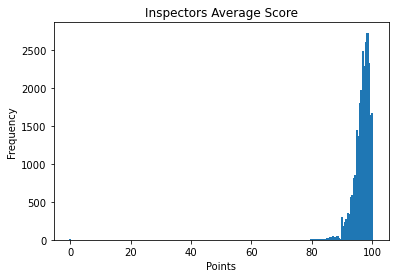

In [24]:
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = all_rest_df['SCORE'].value_counts().sort_index() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency)
# set title and labels 
ax.set_title('Inspectors Average Score') 
ax.set_xlabel('Points') 
ax.set_ylabel('Frequency')
#ax.margins(x=0,y=0)




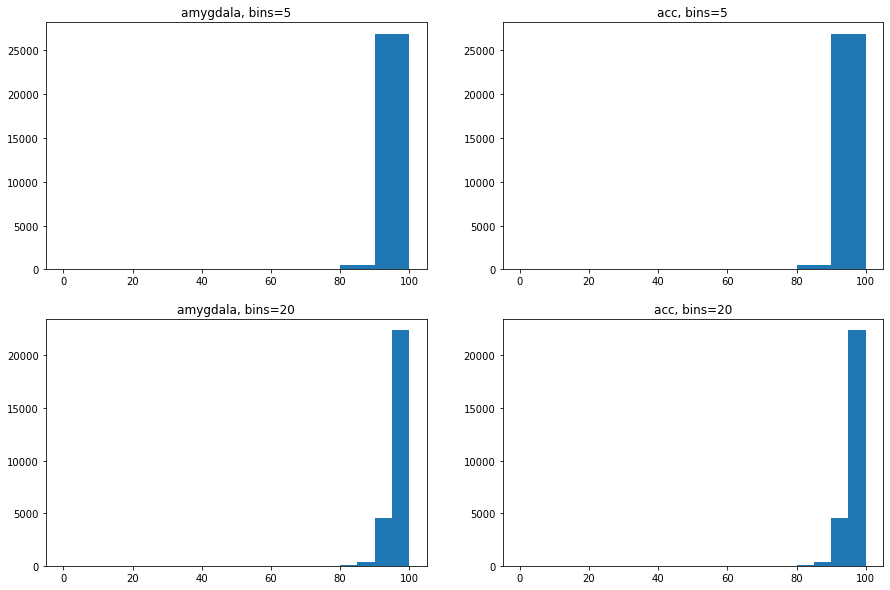

In [19]:
# View histogram of each feature amygdala and acc
fig,ax = plt.subplots(2,2,figsize=(15,10))
ax[0,0].hist(all_rest_df['SCORE'],bins=10)
ax[0,0].set_title('amygdala, bins=5')
ax[0,1].hist(all_rest_df['SCORE'],bins=10)
ax[0,1].set_title('acc, bins=5')
ax[1,0].hist(all_rest_df['SCORE'],bins=20)
ax[1,0].set_title('amygdala, bins=20')
ax[1,1].hist(all_rest_df['SCORE'],bins=20)
ax[1,1].set_title('acc, bins=20')
plt.show()

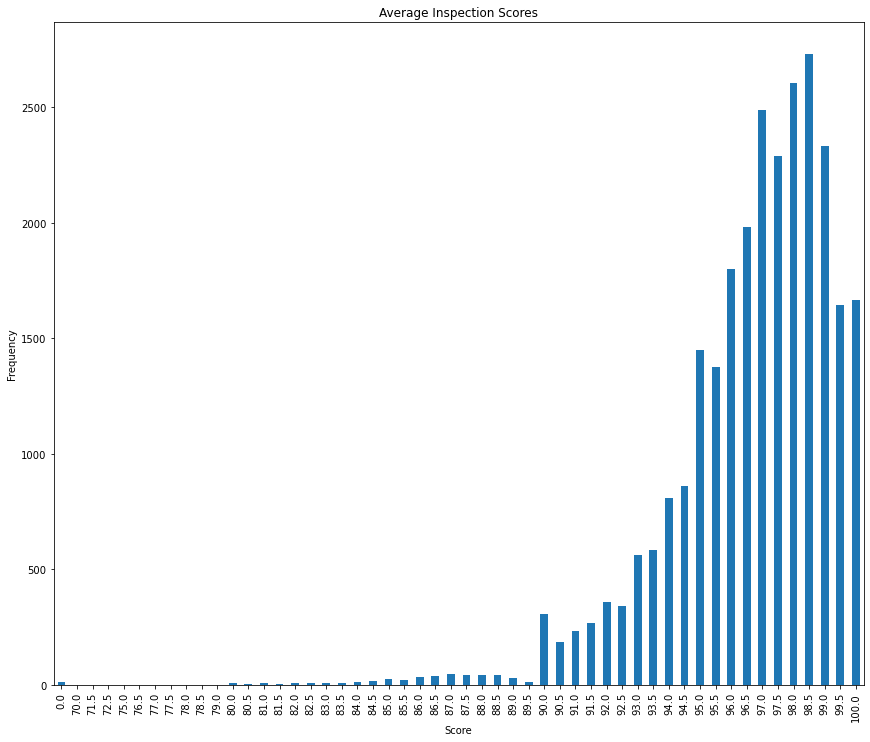

In [46]:
# Bar chart of counts for each inspection score given
plt.figure(figsize=(12,10))
all_rest_df['SCORE'].value_counts().sort_index().plot(kind='bar')
plt.tight_layout()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Average Inspection Scores')
plt.show()